<a href="https://colab.research.google.com/github/KayalvizhiT513/Eigen-Values-and-Vectors/blob/main/Diagonalization_Notebook2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def matrix_mul(A, B):
    if len(A[0]) != len(B):
        raise ValueError("Number of columns in A must be equal to the length of vector u")

    result = []
    for i in range(len(A)):
        sum = 0
        for k in range(len(B)):
            sum += A[i][k] * B[k]
        result.append(sum)
    return result

In [174]:
def plot_graph(A, u, v):
    x_values = [0, 8]
    y_values = [0, 8]

    # Define starting and ending points for arrows
    start1 = (0, 0)
    end1 = A[0]

    start2 = (0, 0)
    end2 = A[1]

    start3 = (0, 0)
    end3 = u

    start4 = (0, 0)
    end4 = v

    # Create a figure and axis
    fig, ax = plt.subplots()

    # Plot arrows
    b21 = ax.plot([8-0.3,11], [8-0.3,11], color='gray')
    b22 = ax.plot([0,-11], [0,-11], color='gray')
    b11 = ax.plot([end1[0]-start1[0]-0.3, 20], [end1[1]-start1[1]+0.03,-10], color='gray')
    b12 = ax.plot([0,-8], [0,4], color='gray')
    line2 = ax.plot([8,10], [8,7], color='black')
    line3 = ax.plot([10, 2], [7,-1], color='black')
    arrow1 = ax.arrow(*start1, end1[0]-start1[0]-0.3, end1[1]-start1[1]+0.03, head_width=0.3, head_length=0.3, fc='red', ec='red')
    arrow2 = ax.arrow(*start2, end2[0]-start2[0]-0.3, end2[1]-start2[1]-0.3, head_width=0.3, head_length=0.3, fc='red', ec='red')
    b1 = ax.scatter(end1[0], end1[1], color='blue')
    b2 = ax.scatter(end2[0], end2[1], color='blue')
    arrow3 = ax.scatter(end3[0], end3[1], color='blue')
    arrow4 = ax.scatter(end4[0], end4[1], color='blue')
    arrow5 = ax.arrow(*(1, 1), 7-0.3, 7-0.3, head_width=0.3, head_length=0.3, fc='green', ec='green')

    arrow5 = ax.arrow(*(2/3, -1/3), 2-(2/3), 1+0.33, head_width=0, head_length=0, fc='black', ec='black', linestyle='dotted')
    arrow6 = ax.arrow(*(4/3, 4/3), 2-(4/3), 1-(4/3), head_width=0, head_length=0, fc='black', ec='black', linestyle='dotted')

    # Add labels near the arrow heads
    ax.annotate(f'b1 = {end1}', xy=(end1[0]+1, end1[1]-1.01), xytext=(-20, 15), textcoords='offset points')
    ax.annotate(f'b2 = {end2}', xy=(end2[0]-1, end2[1]-0.5), xytext=(-20, 15), textcoords='offset points')
    ax.annotate(f'x = {end3}; B-Coords are (1/3, 4/3)', xy=(end3[0], end3[1]), xytext=(5, -5), textcoords='offset points')
    ax.annotate(f'[1,8] in B-Coords\n {end4} in std-Coords', xy=(end4[0], end4[1]), xytext=(5, -5), textcoords='offset points')

    # Set limits and labels
    ax.set_xlim(-5, 15)
    ax.set_ylim(-5, 15)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')

    # Show plot
    plt.grid()
    plt.show()

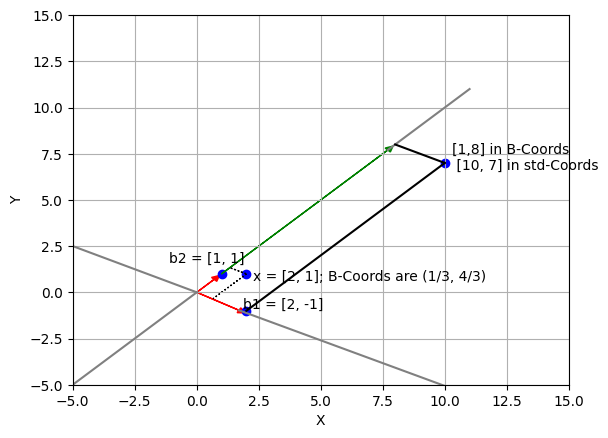

In [175]:
A = [[2, -1],[1, 1]]
u = [2, 1]
v = [10, 7]

plot_graph(A,u,v)